In [3]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import StandardScaler
import umap

# For reproducibility
from teachopencadd.utils import seed_everything
SEED = 42
seed_everything(SEED)

In [4]:
train_file_path = "../Data/Data/Initial Filtering/train_filter.csv"
test_file_path = "../Data/Data/Initial Filtering/test_filter.csv"

train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

train_num = train_df.select_dtypes(include = ['float64', 'int64'])

print("Full train dataset shape is {}".format(train_df.shape))
print("Full test dataset shape is {}".format(test_df.shape))

Full train dataset shape is (1460, 67)
Full test dataset shape is (1459, 66)


# Identify Outliers Using UMAP

In [5]:
# # configure the style of plots generated by Seaborn library
sns.set(style="white", context="notebook", rc = {'figure.figsize':(14,10)})

# UMAP projection

# Construct UMAP object (instantiate UMAP class)
reducer = umap.UMAP(random_state=SEED, n_neighbors=10, min_dist=0.0, n_components=5)

#Convert each feature into z-scores (number of standard deviations from the mean, for comparbility)
scaled_data = StandardScaler().fit_transform(train_num.values)

In [6]:
#fit_transform method calls fit
#returns the transformed data as a numpy array
embedding = reducer.fit_transform(scaled_data)
embedding.shape

/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(1460, 5)

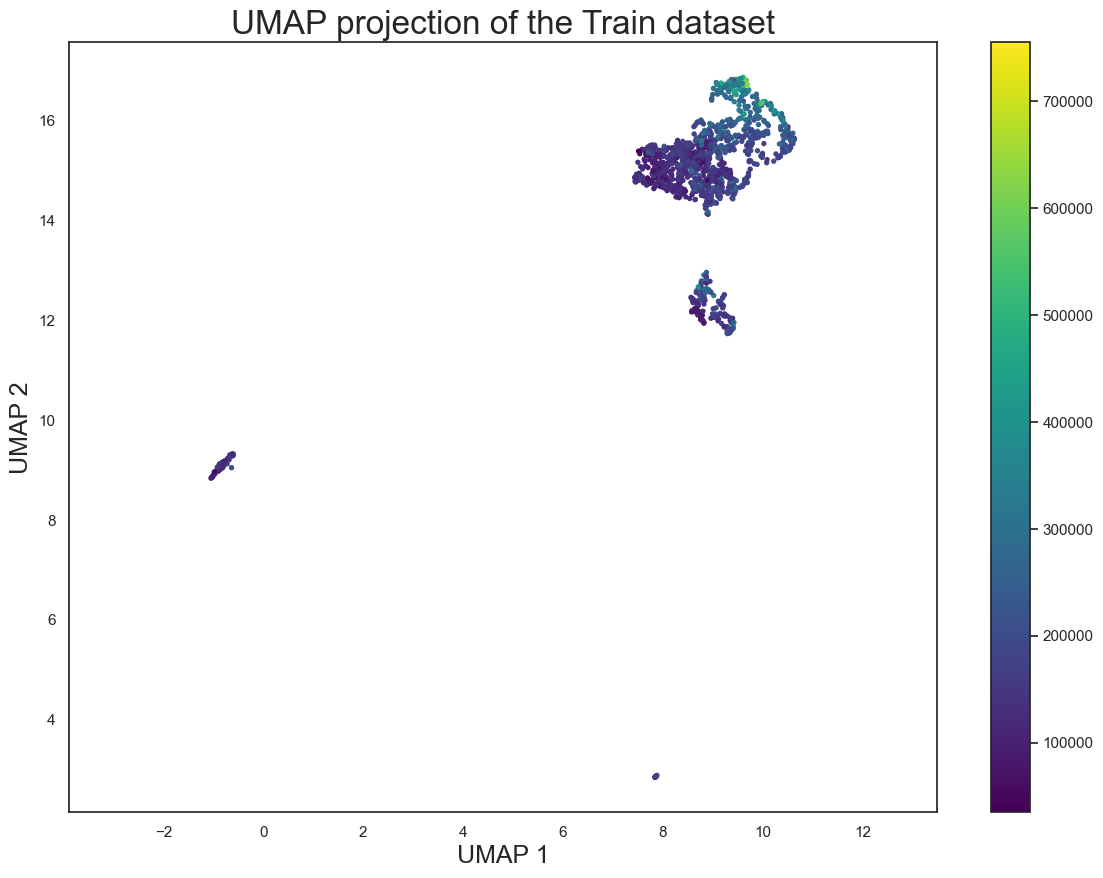

In [7]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=train_df['SalePrice'],
    cmap='viridis', s =8)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar()
plt.xlabel('UMAP 1', fontsize=18)
plt.ylabel('UMAP 2', fontsize=18)
plt.title('UMAP projection of the Train dataset', fontsize=24);

In [ ]:
# plot train_df and test_df on the same UMAP projection
# Convert each feature into z-scores (number of standard deviations from the mean, for comparbility)

In [8]:
# Explore the furthest cluster whose x values is less than 3
# Add UMAP coordinates to the dataframe
train_df["UMAP1"] = embedding[:, 0]
train_df["UMAP2"] = embedding[:, 1]

print(train_df[train_df["UMAP1"] < 3].shape)
print(train_df[train_df["UMAP2"] < 3].shape)
print(f"We are eliminating {58+86} rows from the dataset as outliers")

outliers = train_df[(train_df["UMAP1"] < 3) | (train_df["UMAP2"] < 3)]
# outliers = outliers.append(train_df[train_df["UMAP2"] < 3])

train_df.drop(train_df[train_df["UMAP1"] < 3].index, inplace=True)
train_df.drop(train_df[train_df["UMAP2"] < 3].index, inplace=True)

(65, 69)
(15, 69)
We are eliminating 144 rows from the dataset as outliers


In [9]:

train_df.drop(columns=["Id", "UMAP1", "UMAP2"], inplace=True)
print(f"Our dataset now has {train_df.shape[0]} rows")

Our dataset now has 1380 rows


In [10]:
train_df.to_csv("../Data/Data/train_filter_UMAP.csv", index=False)